### Correlation Analysis

Lets check the correlation between variables

Correlation measures the strength and direction of the linear relationship between two variables, but it is normalized to be independent of the units of the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()

dataset_path=os.getenv("PROCESSED_ADNI_DATASET")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,1140,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1051,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,15,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,680,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,324,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


### Feature correlation check

In [7]:
# Plot a heatmap
def headmap_plot(dataset):

    plt.figure(figsize=(20, 20))  

    sns.heatmap(dataset.corr(), 
                annot = True, 
                fmt = ".3f", 
                cmap = "coolwarm",
                square = True,
                linewidths = 0.5)
    plt.title('Correlation Heatmap')
    plt.show()

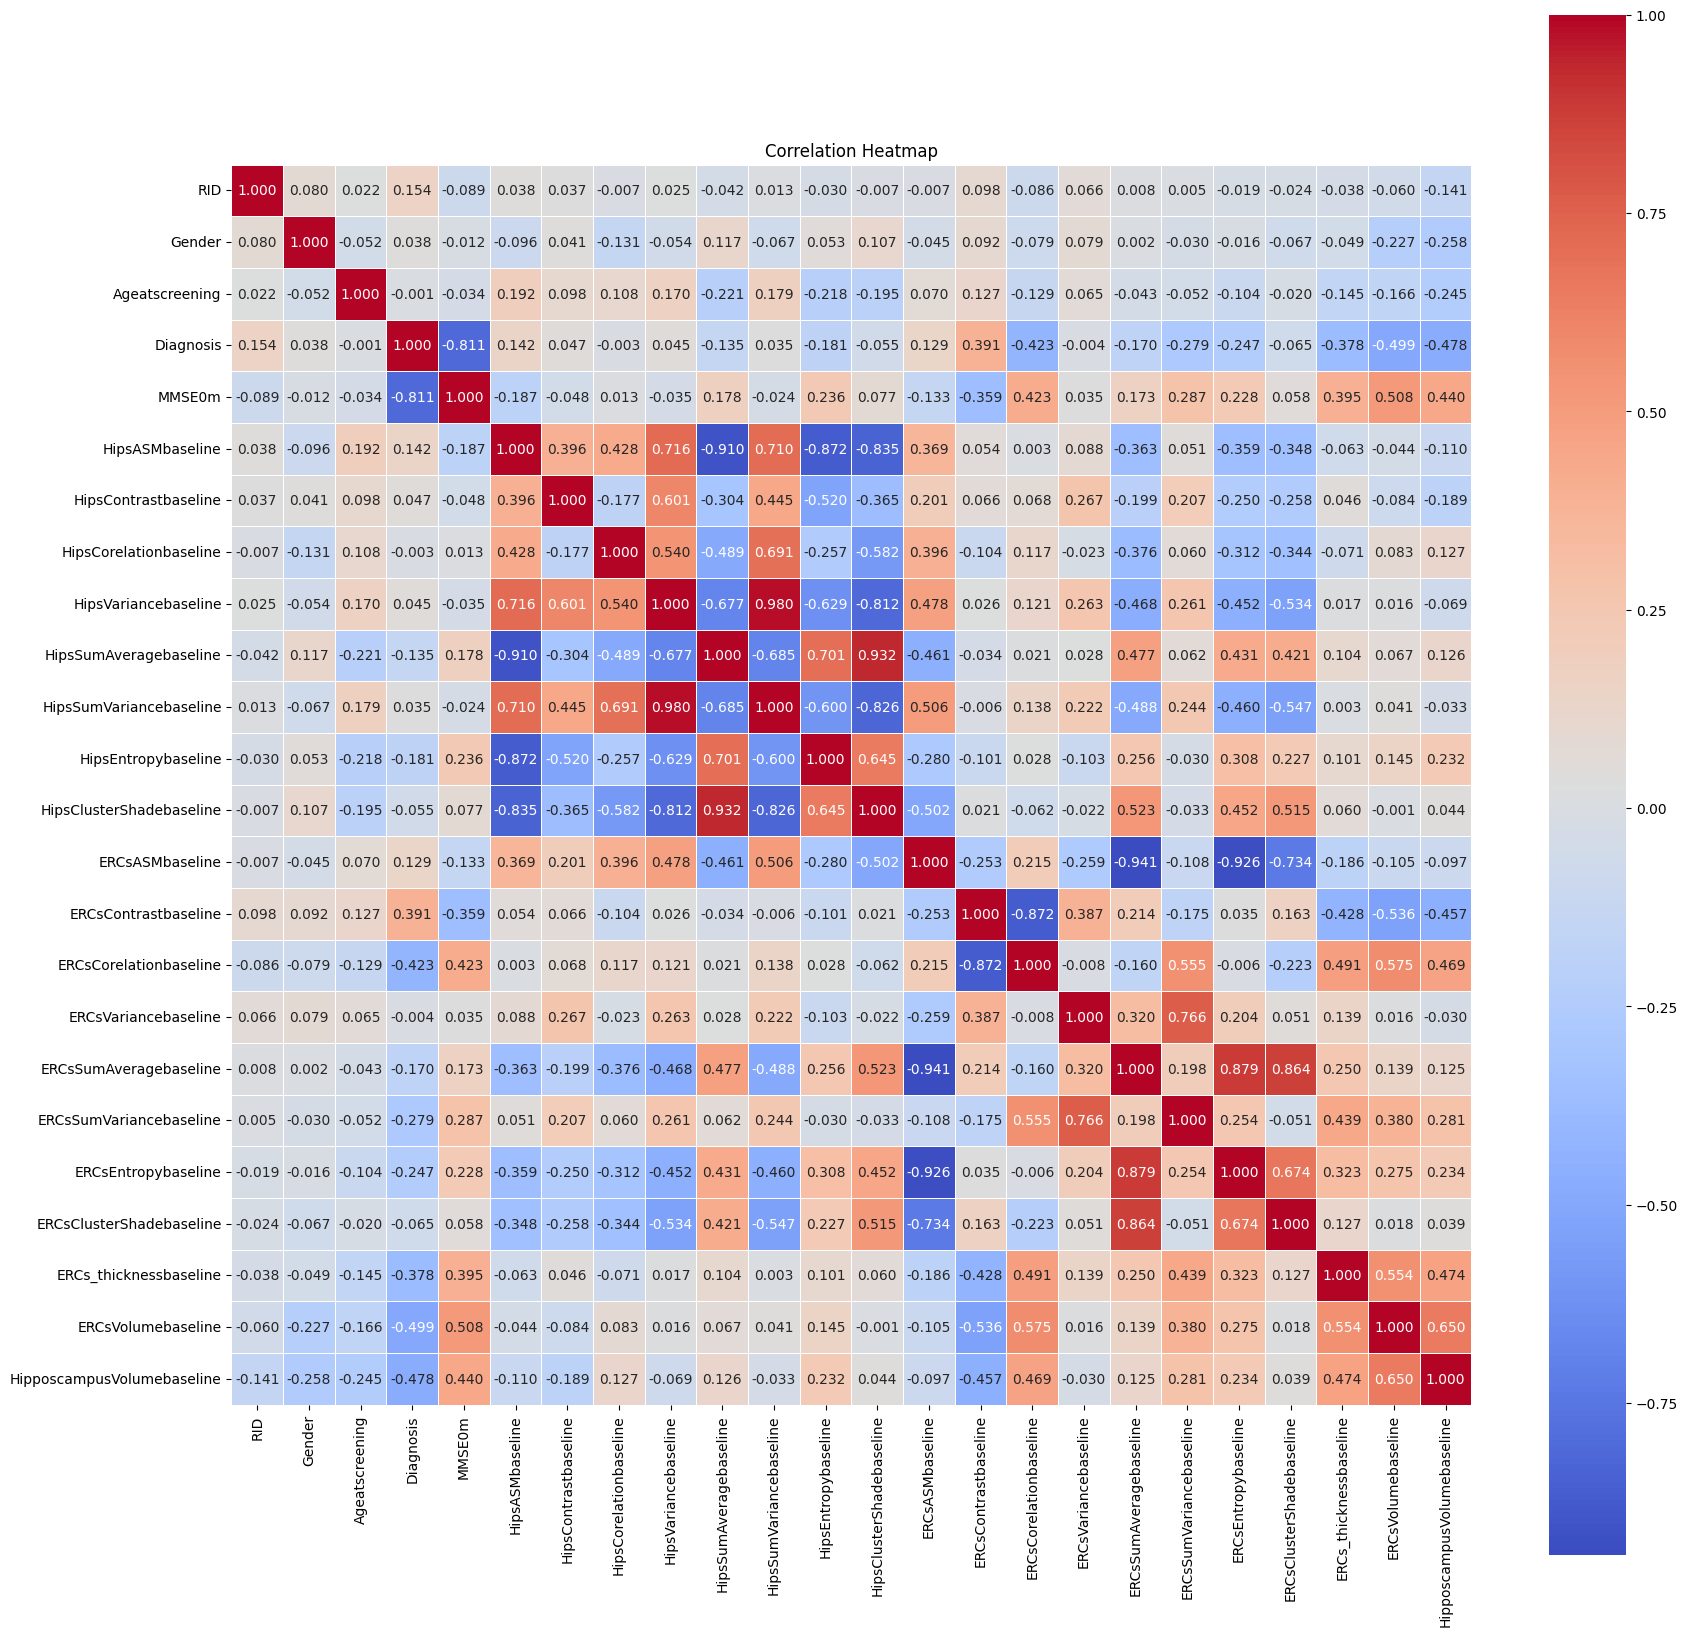

In [8]:
headmap_plot(dataset)

In [33]:
def correlation_report(dataset, method):
    
    correlation_pairs = pg.pairwise_corr(data = dataset, method=method)
    correlation_report = correlation_pairs[correlation_pairs["r"].abs() >= 0.9]
    columns = ["X", "Y", "r"]
    correlation_report = correlation_report[columns]
    
    return correlation_report

r measures the linear relationship between two variables, from -1 (negative) to 1 (positive), with high absolute values indicating strong correlation. 

p-unc is the p-value testing if the correlation is zero, small values mean it’s statistically significant.

In [34]:
correlation_report(dataset, "spearman")

,X,Y,r
108,HipsASMbaseline,HipsSumAveragebaseline,-0.925818
111,HipsASMbaseline,HipsClusterShadebaseline,-0.904515
157,HipsVariancebaseline,HipsSumVariancebaseline,0.970092
173,HipsSumAveragebaseline,HipsClusterShadebaseline,0.961564
224,ERCsASMbaseline,ERCsSumAveragebaseline,-0.942388
226,ERCsASMbaseline,ERCsEntropybaseline,-0.926682


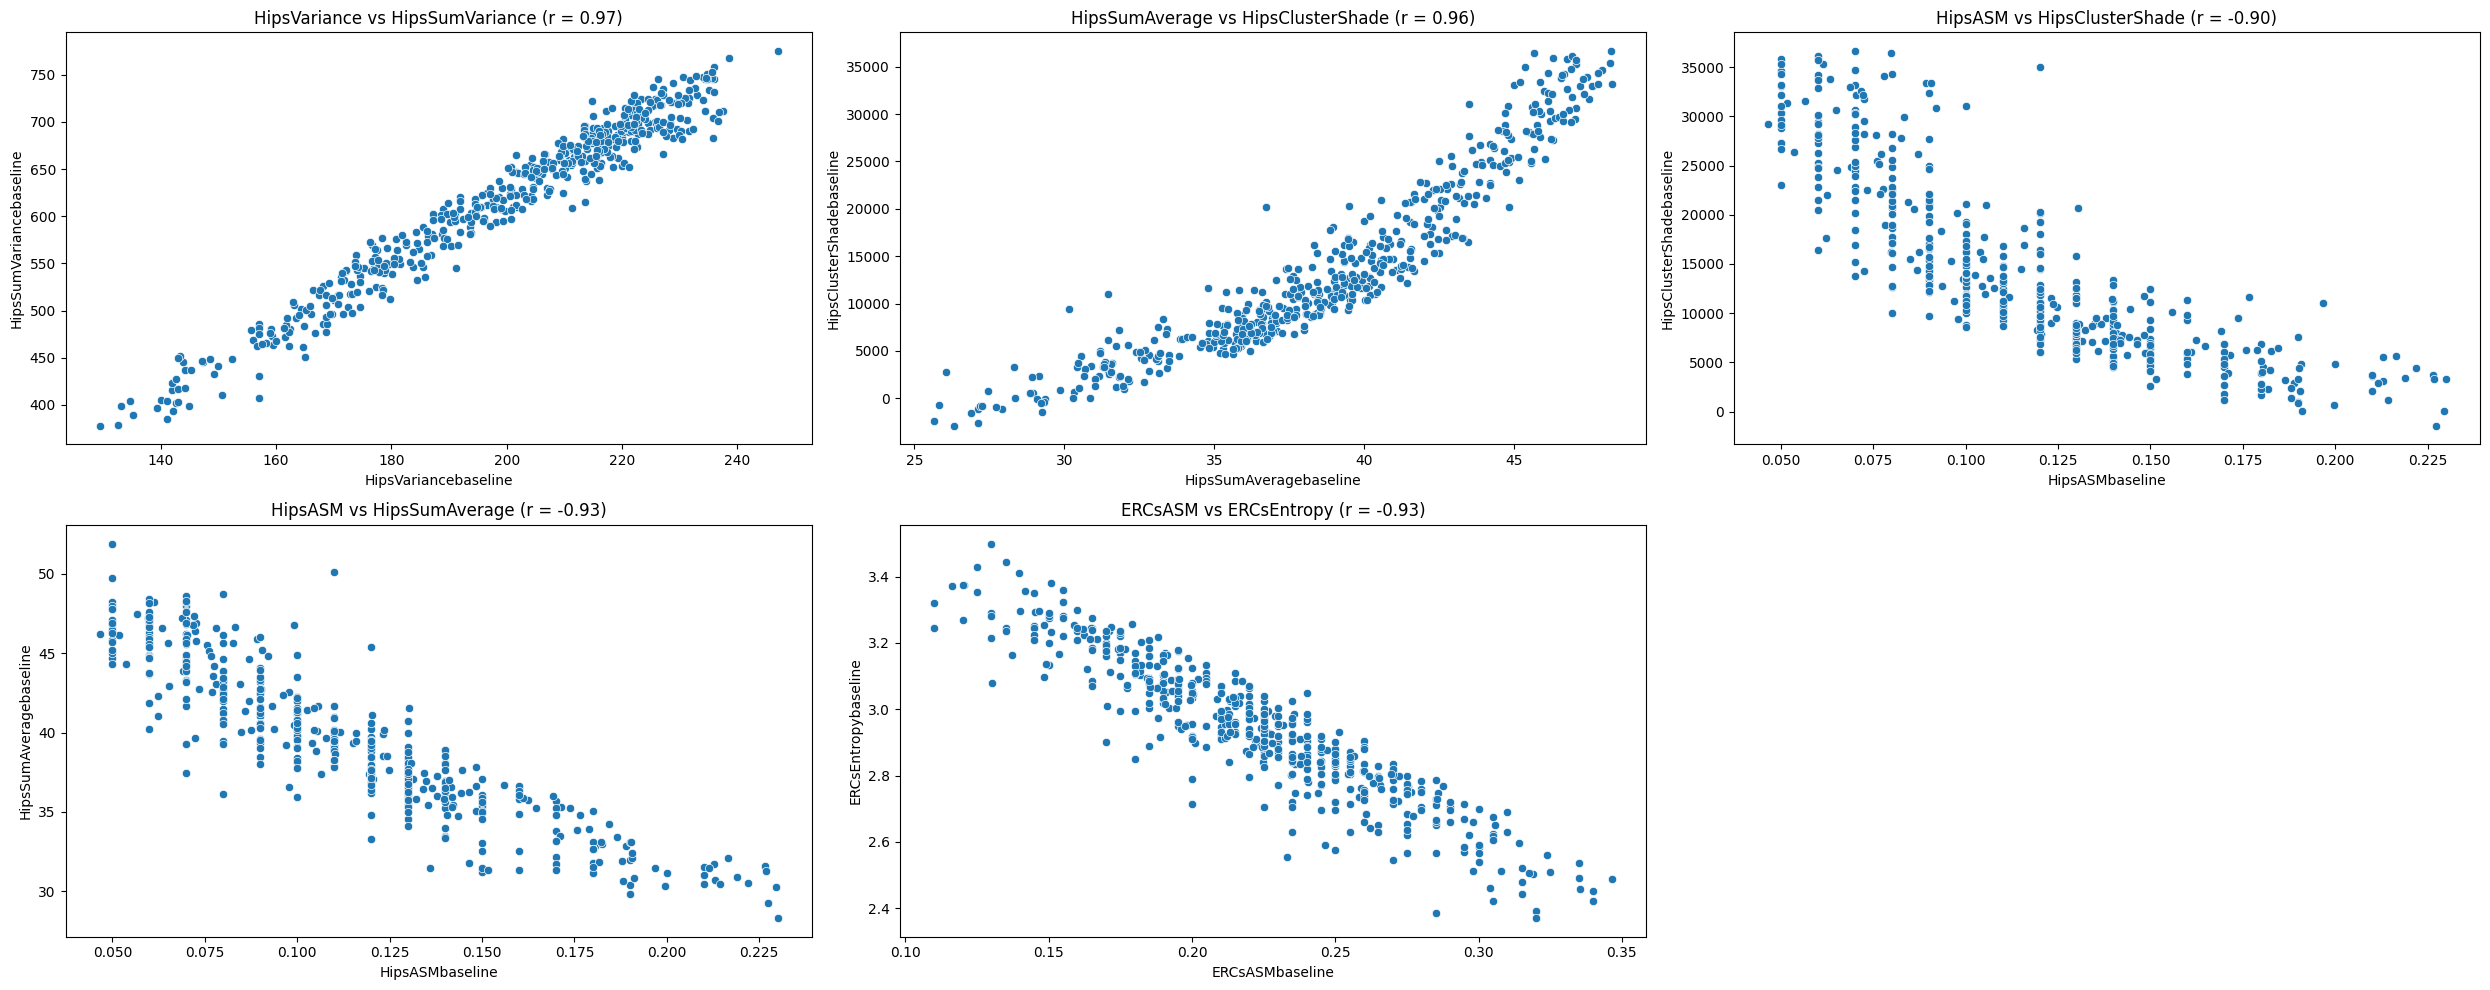

In [35]:
# Set up the figure with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# Remove the unused 6th subplot if needed
fig.delaxes(axs[1][2])

# Plot each of the six strongest correlation pairs
sns.scatterplot(data=dataset, x="HipsVariancebaseline", y="HipsSumVariancebaseline", ax=axs[0][0])
axs[0][0].set_title("HipsVariance vs HipsSumVariance (r = 0.97)")

sns.scatterplot(data=dataset, x="HipsSumAveragebaseline", y="HipsClusterShadebaseline", ax=axs[0][1])
axs[0][1].set_title("HipsSumAverage vs HipsClusterShade (r = 0.96)")

sns.scatterplot(data=dataset, x="HipsASMbaseline", y="HipsClusterShadebaseline", ax=axs[0][2])
axs[0][2].set_title("HipsASM vs HipsClusterShade (r = -0.90)")

sns.scatterplot(data=dataset, x="HipsASMbaseline", y="HipsSumAveragebaseline", ax=axs[1][0])
axs[1][0].set_title("HipsASM vs HipsSumAverage (r = -0.93)")

sns.scatterplot(data=dataset, x="ERCsASMbaseline", y="ERCsEntropybaseline", ax=axs[1][1])
axs[1][1].set_title("ERCsASM vs ERCsEntropy (r = -0.93)")

sns.scatterplot(data=dataset, x="ERCsASMbaseline", y="ERCsSumAveragebaseline", ax=axs[1][2])
axs[1][2].set_title("ERCsASM vs ERCsSumAverage (r = -0.94)")

# Improve layout
plt.tight_layout()
plt.show()


This is fantastic! Isnt this more efficient instead of manually checking each column name in the pairplot? 

We can now understand how each variable is affected to one another. 

But how about the **target**? Lets narrow it down to see which features are strongly correlated with the target

### Target correlation

In [36]:
# Check correlation between each variable and target
correlation_with_target = dataset.corr()["Diagnosis"].sort_values(ascending=False)
correlation_with_target

Diagnosis                     1.000000
ERCsContrastbaseline          0.391197
RID                           0.154451
HipsASMbaseline               0.141705
ERCsASMbaseline               0.129275
HipsContrastbaseline          0.046995
HipsVariancebaseline          0.045215
Gender                        0.038424
HipsSumVariancebaseline       0.035414
Ageatscreening               -0.000641
HipsCorelationbaseline       -0.002882
ERCsVariancebaseline         -0.004006
HipsClusterShadebaseline     -0.055183
ERCsClusterShadebaseline     -0.065036
HipsSumAveragebaseline       -0.135112
ERCsSumAveragebaseline       -0.170326
HipsEntropybaseline          -0.181232
ERCsEntropybaseline          -0.247419
ERCsSumVariancebaseline      -0.278808
ERCs_thicknessbaseline       -0.377622
ERCsCorelationbaseline       -0.422922
HipposcampusVolumebaseline   -0.477563
ERCsVolumebaseline           -0.498710
MMSE0m                       -0.811498
Name: Diagnosis, dtype: float64

<Axes: >

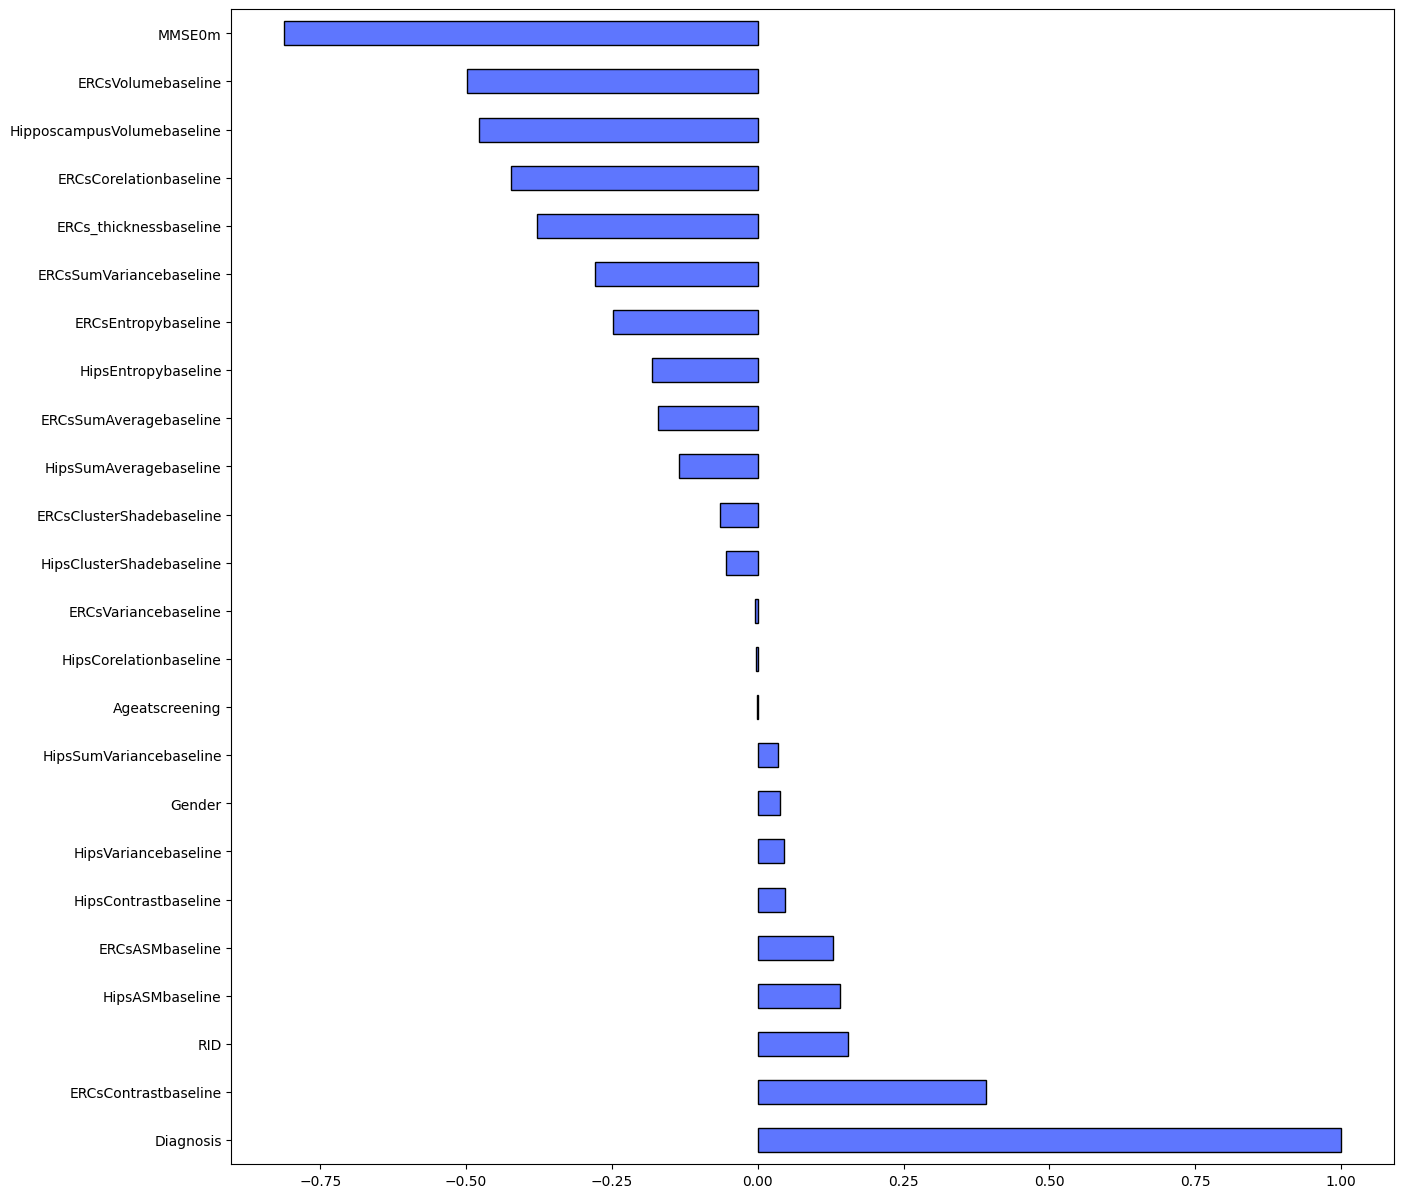

In [37]:
# Plot target correlaton using bar
plt.figure(figsize=(15,15))

correlation_with_target.plot(kind = "barh", 
                             color = "#5e76fe",
                             edgecolor = "black")

I believe we have a solid understanding now regarding our target feature. This will help us a lot when performing feature selection and further understand overall feature importance.